In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
dir = "/content/drive/My Drive/Colab Notebooks/animal"

width = 299
height = 299

In [10]:
data_generator = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    # vertical_flip = True,
    zoom_range = 0.2,
    # width_shift_range = 0.2,
    height_shift_range = 0.1,
    rescale = 1 / 255,
    validation_split = 0.2,
)

train_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 8,
    # save_to_dir = '/content/drive/My Drive/Colab Notebooks/augment_animals',
    class_mode = 'categorical',
    subset = 'training'
)

validation_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 148 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [0]:
model.compile(optimizer=Adam(), 
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [16]:
batch_size = 8

output = model.fit(
    train_data,
    steps_per_epoch = train_data.samples // batch_size,
    epochs = 5,
    validation_data = val_data, 
    validation_steps = validation_data.samples // batch_size,    
    class_weight = {0:1 , 1:1 , 2:2},
    shuffle = True
)

Epoch 1/5
18/18 [==============================] - 6s 314ms/step - loss: 1.5589 - accuracy: 0.3643 - val_loss: 1.0322 - val_accuracy: 0.3125
Epoch 2/5
18/18 [==============================] - 5s 303ms/step - loss: 1.3126 - accuracy: 0.4286 - val_loss: 1.0362 - val_accuracy: 0.4000
Epoch 3/5
18/18 [==============================] - 5s 302ms/step - loss: 1.2716 - accuracy: 0.4722 - val_loss: 1.1214 - val_accuracy: 0.3750
Epoch 4/5
18/18 [==============================] - 5s 301ms/step - loss: 0.9812 - accuracy: 0.5286 - val_loss: 0.9414 - val_accuracy: 0.5333
Epoch 5/5
18/18 [==============================] - 5s 291ms/step - loss: 0.9851 - accuracy: 0.5714 - val_loss: 1.0573 - val_accuracy: 0.5625


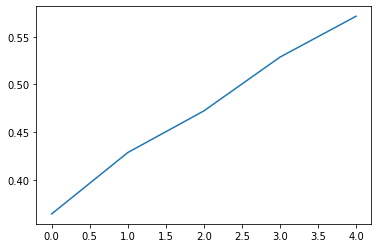

In [18]:
plt.plot(output.history['accuracy'])
plt.show()